In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm 
from statsmodels.tsa.arima_process import arma_generate_sample 
from PythonTsa.plot_acf_pacf import acf_pacf_fig 
from PythonTsa.LjungBoxtest import plot_LB_pvalue
from statsmodels.tsa.arima.model import ARIMA

path = "/Users/ruting/Documents/Github/pyTSA/ATSSB_ARMA_and_ARIMA_Modeling_Forecasting"
os.chdir(path)

ar=np.array([1, -0.8, 0.6])
ma=np.array([1, 0.7, 0.4])
np.random.seed(12357)
y=arma_generate_sample(ar=ar, ma=ma, nsample=500)
y=pd.Series(y, name='y')

arma30=ARIMA(y, order=(3,0,0),trend='n').fit()
print(arma30.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -732.871
Date:                Mon, 14 Apr 2025   AIC                           1473.743
Time:                        21:23:42   BIC                           1490.601
Sample:                             0   HQIC                          1480.358
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5113      0.038     39.602      0.000       1.436       1.586
ar.L2         -1.3035      0.051    -25.604      0.000      -1.403      -1.204
ar.L3          0.4659      0.040     11.527      0.0

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from PythonTsa.plot_acf_pacf import acf_pacf_fig
from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from PythonTsa.ModResidDiag import plot_ResidDiag
from PythonTsa.datadir import getdtapath

dtapath=getdtapath()
tep=pd.read_csv(dtapath + 'Global mean surface air temp changes 1880-1985.csv', header=None)
# dates=pd.date_range('1880-12',periods=len(tep),freq='YE-DEC')
dates = pd.date_range(start='1880-12-31', periods=len(tep), freq='A-DEC')


                               SARIMAX Results                                
Dep. Variable:                   dtep   No. Observations:                  105
Model:                 ARIMA(1, 0, 3)   Log Likelihood                  73.779
Date:                Mon, 14 Apr 2025   AIC                           -135.558
Time:                        21:24:12   BIC                           -119.634
Sample:                    12-31-1881   HQIC                          -129.105
                         - 12-31-1985                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0053      0.003      2.102      0.036       0.000       0.010
ar.L1         -0.9613      0.057    -16.770      0.000      -1.074      -0.849
ma.L1          0.5884      0.107      5.475      0.0

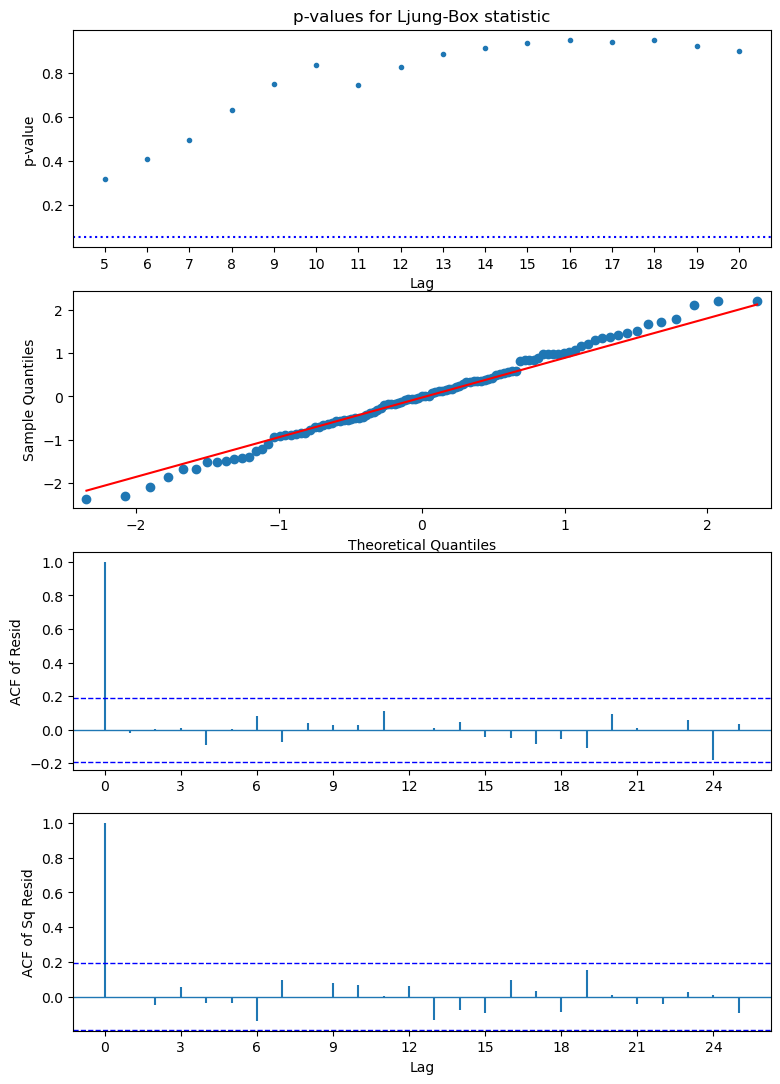

In [3]:

tep.index=dates
tepts=pd.Series(tep[0], name='tep')
dtepts=tepts.diff(1)
dtepts=dtepts.dropna()
dtepts.name='dtep'
arma13=ARIMA(dtepts, order=(1,0,3),trend='c').fit(method='innovations_mle')
print(arma13.summary())

resid13 = arma13.resid
stats.normaltest(resid13)
plot_ResidDiag(resid13,noestimatedcoef=4,nolags=20,lag=25)
plt.savefig('Diagnostic.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.show()

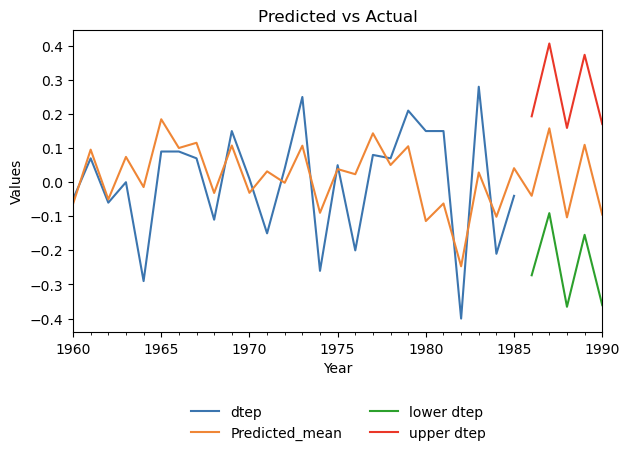

In [5]:

pred=arma13.get_prediction(start='1960-12', end='1990-12')
predicts=pred.predicted_mean
predconf=pred.conf_int()
predframe=pd.concat([dtepts['1960-12-31':], predicts, predconf['1986-01-31':]], axis=1)

colors = {
    "blue": "#3B75AF",
    "red": "#EA3728",
    "green": "#2CA02C",  
    "orange": "#EF8636"
}


ax = predframe.plot(color=[colors["blue"], colors["orange"], colors["green"], colors["red"]])

plt.title("Predicted vs Actual")
plt.xlabel("Year")
plt.ylabel("Values")


plt.legend(
   ["dtep", "Predicted_mean", "lower dtep", "upper dtep"], 
    loc="upper left", 
    bbox_to_anchor=(0.2, -0.2),
    prop={'size': 10},  # 调整图例字体大小
    ncol=2,  # 让图例横向排列（4列）
    frameon=False  # 让图例背景透明
)

plt.tight_layout()
plt.savefig('Forcasting.png', dpi = 1200, 
            bbox_inches ='tight', transparent = True)
plt.savefig('Forecasting.eps', 
            dpi=1200, 
            bbox_inches='tight', 
            transparent=False, 
            format='eps')
plt.show()
